<a href="https://colab.research.google.com/github/magmatic654/Alura-Store_Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos



In [235]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

Unimos las tiendas en un solo DataFrame

In [236]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
df_tiendas.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
2073,Sillón,Muebles,238200.0,15100.0,18/04/2020,Ángel Rodriguez,Bogotá,1,Tarjeta de crédito,4,4.60971,-74.08175,Tienda 3
335,Guitarra acústica,Instrumentos musicales,321600.0,17300.0,23/09/2020,Izabela de León,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 3
1869,Mesa de comedor,Muebles,308500.0,16600.0,27/08/2021,Juliana Costa,Cali,1,Tarjeta de crédito,4,3.43722,-76.52250,Tienda 3
2355,Lavadora de ropa,Electrodomésticos,1220100.0,65200.0,09/02/2020,Santiago Silva,Bogotá,4,Tarjeta de crédito,5,4.60971,-74.08175,Tienda 2
2293,Cuerda para saltar,Deportes y diversión,9700.0,7700.0,23/03/2023,Mariana Herrera,Bogotá,4,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 1


#1. Análisis de facturación




Calculamos los ingresos de cada tienda

In [237]:
ingresos_por_tienda = df_tiendas.groupby('Tienda')['Precio'].sum().rename('Ingresos')
ingresos_por_tienda

,Ingresos
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


Determinar la tienda con menores ingresos

In [238]:
tienda_menor_ingreso = ingresos_por_tienda.idxmin()
menor_ingreso = ingresos_por_tienda.min()
print(tienda_menor_ingreso, 'con', menor_ingreso)


Tienda 4 con 1038375700.0


## Grafico de Barras



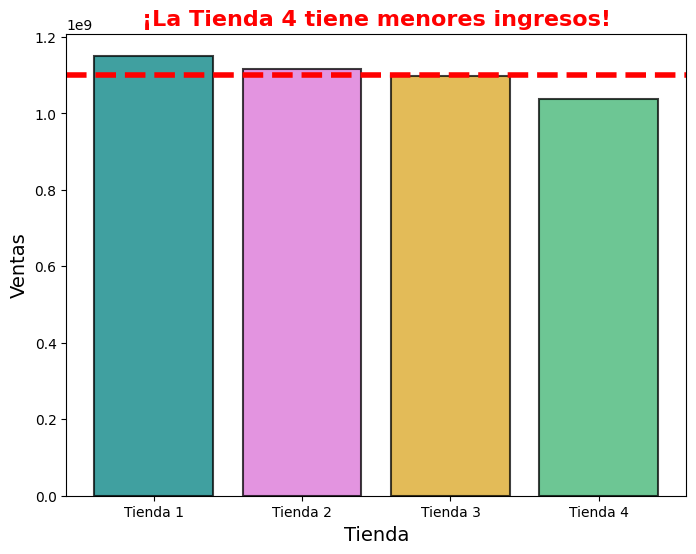

In [239]:
import matplotlib.pyplot as plt

# Definir el color de cada tienda
color_map = {
    'Tienda 1': 'teal',
    'Tienda 2': 'orchid',
    'Tienda 3': 'goldenrod',
    'Tienda 4': 'mediumseagreen'
}

# Asignar el mismo color para cada tienda
colors = [color_map[store] for store in ingresos_por_tienda.index]

# Titulo de Grafico
titulo = f'¡La {tienda_menor_ingreso} tiene menores ingresos!'

# Grafico de barras
plt.figure(figsize=(8, 6))
plt.bar(ingresos_por_tienda.index,
        ingresos_por_tienda.values,
        color=colors, edgecolor='black',
        linewidth=1.5,
        alpha=0.75
        )

# Configurar Grafico de barras
plt.title(titulo, weight='bold', size=16, color='red')
plt.xlabel('Tienda', size=14)
plt.ylabel('Ventas', size=14)

# Calcular promedio
promedio = ingresos_por_tienda.mean()

# Dibujar la linea de promedio
plt.axhline(y=promedio, color='red',
            linestyle='--',
            linewidth=4,
            )

# Mostrar Grafico
plt.show()

Como podemos ver, la tienda 4 tiene ingresos menores que el resto de las tiendas y se encuentra muy por debajo del promedio lo cual es preocupante.

# 2. Ventas por categoría

Agrupamos las ventas por categoria

In [240]:
ventas_por_categoria = df_tiendas.groupby(['Tienda', 'Categoría del Producto']
                                          )['Producto'].count().rename('Ventas')


Determinamos las 3 categorias con mas ventas para cada tienda

In [241]:
top_3_ventas_tiendas = ventas_por_categoria.groupby('Tienda', group_keys=False).nlargest(3)
top_3_ventas_tiendas

Tienda    Categoría del Producto
Tienda 1  Muebles                   465
          Electrónicos              448
          Juguetes                  324
Tienda 2  Muebles                   442
          Electrónicos              422
          Juguetes                  313
Tienda 3  Muebles                   499
          Electrónicos              451
          Juguetes                  315
Tienda 4  Muebles                   480
          Electrónicos              451
          Juguetes                  338
Name: Ventas, dtype: int64

# 3. Calificación promedio de la tienda


Determinamos la media de calificaciones para cada tienda para conocer la satisfaccion del cliente

In [242]:
calificaciones_promedio = df_tiendas.groupby('Tienda')['Calificación'].mean().round(2).sort_values()

In [243]:
tienda_menor_calificada = calificaciones_promedio.idxmin()
menor_calificacion = calificaciones_promedio[tienda_menor_calificada]

mejor_calificacion = calificaciones_promedio.tail(1).values[0]

### Grafico que muestra las calificaciones promedio para cada tienda

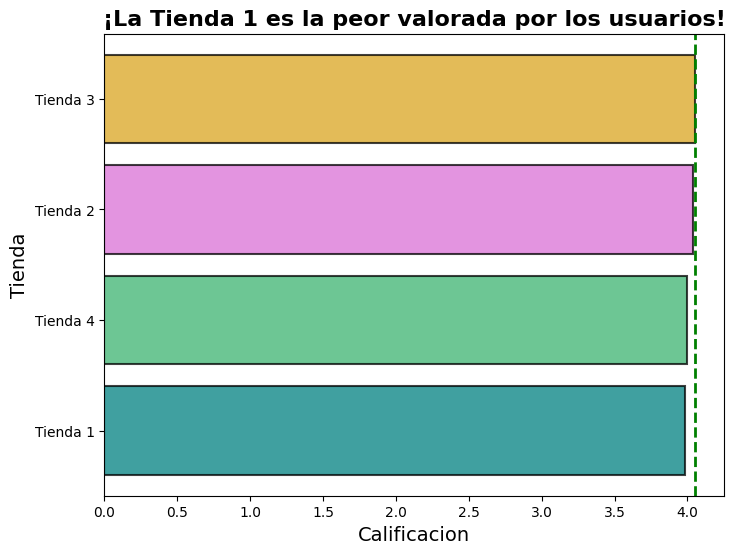

In [244]:
import matplotlib.pyplot as plt

# Definir el color de cada tienda
color_map = {
    'Tienda 1': 'teal',
    'Tienda 2': 'orchid',
    'Tienda 3': 'goldenrod',
    'Tienda 4': 'mediumseagreen'
}

# Asignar el mismo color para cada tienda
colors = [color_map[store] for store in calificaciones_promedio.index]

# Titulo de Grafico
titulo = f'¡La {tienda_menor_calificada} es la peor valorada por los usuarios!'

# Grafico de barras
plt.figure(figsize=(8, 6))
plt.barh(calificaciones_promedio.index, calificaciones_promedio.values, # Valores del grafico
        color=colors, alpha=0.75, # Colores de Grafico
        edgecolor='black', linewidth=1.5, # Configuracion del borde del grafico
        )

# Configurar Grafico de barras
plt.title(titulo, weight='bold', size=16, color='black')
plt.ylabel('Tienda', size=14)
plt.xlabel('Calificacion', size=14)

# Linea vertical con la tienda con mayor calificacion
plt.axvline(mejor_calificacion,
            linewidth=2,
            color='green',
            linestyle='--')

# Mostrar Grafico
plt.show()

Aunque la Tienda 1 es la peor valorada por los usuarios, podemos ver que la Tienda 4 le sigue por no mucha diferencia

# 4. Productos más y menos vendidos

Determinamos las ventas de productos para cada tienda

In [245]:
ventas_por_producto = df_tiendas.groupby(['Tienda', 'Producto'])['Producto'].count()

Determinamos los 3 productos mas vendidos para cada tienda

In [246]:
top_3_productos_mas_vendidos = ventas_por_producto.groupby('Tienda', group_keys=False).nlargest(3)
top_3_productos_mas_vendidos

Tienda    Producto                 
Tienda 1  Armario                      60
          Microondas                   60
          TV LED UHD 4K                60
Tienda 2  Iniciando en programación    65
          Microondas                   62
          Batería                      61
Tienda 3  Kit de bancas                57
          Cama king                    56
          Mesa de comedor              56
Tienda 4  Cama box                     62
          Cubertería                   59
          Cama king                    56
Name: Producto, dtype: int64

Determinamos los 3 productos menos vendidos para cada tienda

In [247]:
top_3_productos_menos_vendidos = ventas_por_producto.groupby('Tienda', group_keys=False).nsmallest(3)
top_3_productos_menos_vendidos

Tienda    Producto                 
Tienda 1  Auriculares con micrófono    33
          Celular ABXY                 33
          Olla de presión              35
Tienda 2  Juego de mesa                32
          Impresora                    34
          Mesa de comedor              34
Tienda 3  Bloques de construcción      35
          Microondas                   36
          Mochila                      36
Tienda 4  Guitarra eléctrica           33
          Armario                      34
          Guitarra acústica            37
Name: Producto, dtype: int64

# 5. Envío promedio por tienda

Calculamos el costo de envio promedio para cada tienda

In [248]:
costo_envio_promedio = df_tiendas.groupby('Tienda')['Costo de envío'].mean()
costo_envio_promedio

,Costo de envío
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


In [249]:
tienda_mayor_costo_envio = costo_envio_promedio.idxmax()

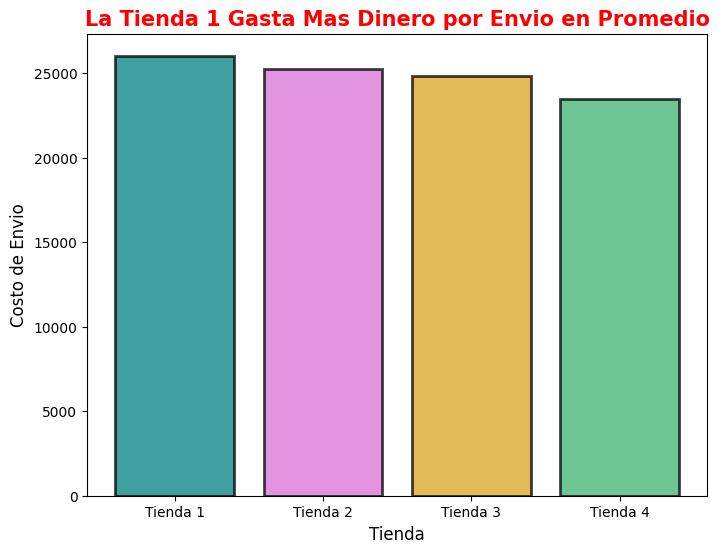

In [250]:
import matplotlib.pyplot as plt

# Definir el color de cada tienda
color_map = {
    'Tienda 1': 'teal',
    'Tienda 2': 'orchid',
    'Tienda 3': 'goldenrod',
    'Tienda 4': 'mediumseagreen'
}

# Ordenar los colores para las tiendas
colors = [color_map[tienda] for tienda in costo_envio_promedio.index]


# Determinar tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear Grafico de barras
plt.bar(x=costo_envio_promedio.index,
        height=costo_envio_promedio.values,
        color=colors,
        alpha=0.75,
        edgecolor='black',
        linewidth=2
        )

# Configuracion del Grafico
plt.title(f'La {tienda_mayor_costo_envio} Gasta Mas Dinero por Envio en Promedio',
          weight='bold',
          color='red',
          size=15)
plt.xlabel('Tienda', size=12)
plt.ylabel('Costo de Envio', size=12)

# Mostrar Grafico
plt.show()

Como podemos ver la tienda 1 es la que mas dinero gasta en promedio por envío

In [251]:
costos_envio_por_tienda = df_tiendas.groupby('Tienda')['Costo de envío'].sum()
costos_envio_por_tienda

,Costo de envío
Tienda,
Tienda 1,61377900.0
Tienda 2,59485100.0
Tienda 3,58516600.0
Tienda 4,55317400.0


In [252]:
# Determinar tienda con menor ganancia
tienda_menor_ganancia_neta = costos_envio_por_tienda.idxmin()

# Determinar ganancias netas
ganancias_netas = ingresos_por_tienda - costos_envio_por_tienda

# Determinar el promedio de ganancias netas
promedio_ganancias_netas = ganancias_netas.mean()

# Determinar porcentajes de diferencia respecto al promedio de cada tienda
porcentajes_de_diferencia =  {nombre_tienda: round(((tienda - promedio_ganancias_netas) / promedio_ganancias_netas)*100, 2) for tienda, nombre_tienda in zip(ganancias_netas, costos_envio_por_tienda.index)}
porcentajes_de_diferencia

{'Tienda 1': np.float64(4.54),
 'Tienda 2': np.float64(1.4),
 'Tienda 3': np.float64(-0.26),
 'Tienda 4': np.float64(-5.68)}

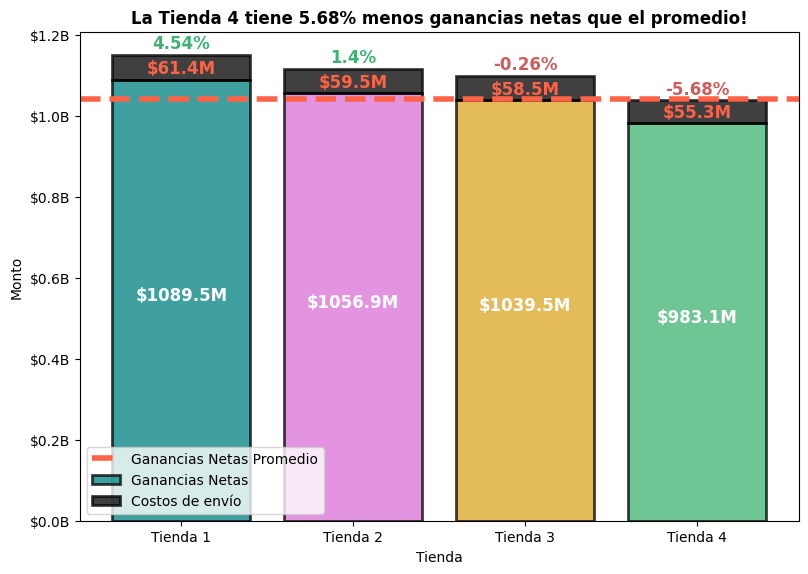

In [319]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

tiendas = ingresos_por_tienda.index
ingresos = ingresos_por_tienda.values
costos = costos_envio_por_tienda.values

# Definir el color de cada tienda
color_map = {
    'Tienda 1': 'teal',
    'Tienda 2': 'orchid',
    'Tienda 3': 'goldenrod',
    'Tienda 4': 'mediumseagreen'
}

# Ordenar los colores para las tiendas
colors = [color_map[tienda] for tienda in porcentajes_de_diferencia.keys()]


# Ganancia neta = ingresos - costos
ganancia_neta = [ing - c for ing, c in zip(ingresos , costos)]

plt.figure(figsize=(8, 6))

# Barra completa: ingresos (ganancia bruta)
plt.bar(tiendas,
        ganancias_netas,
        label='Ganancias Netas',
        color=colors,
        edgecolor='black',
        linewidth=2,
        alpha=0.75
        )

# Barra negativa que baja desde arriba: costos
plt.bar(
    tiendas,
    costos,
    bottom=ganancias_netas, # comienzan desde la parte de arriba de la barra de ingresos
    label='Costos de envío',
    color='black',
    edgecolor='black',
    linewidth=2,
    alpha=0.75
    )

# Configuracion del Grafico
plt.ylabel('Monto')
plt.xlabel('Tienda')
plt.title(f'La {tienda_menor_ganancia_neta} '
          f'tiene {porcentajes_de_diferencia[tienda_menor_ganancia_neta]*-1}% '
          'menos ganancias netas que el promedio!',
          size=12,
          weight='bold',
          color='black',
          )

plt.tight_layout()

# Linea de promedio de costo de envio
plt.axhline(promedio_ganancias_netas,
            color='tomato',
            linestyle='--',
            linewidth=4,
            label='Ganancias Netas Promedio',
            )

# Porcentajes de diferencia para cada barra respecto al promedio

for tienda, monto in zip(ganancias_netas.index, ganancias_netas):
  diferencia = porcentajes_de_diferencia[tienda]

  if diferencia >= 0:
    color = 'mediumseagreen'
  else:
    color = 'indianred'

  plt.text(tienda,
           ((monto + costos_envio_por_tienda[tienda])*1.015) ,
           f"{diferencia}%",
           color = color,
           weight='bold',
           size=12,
           ha='center'
           )
  plt.text(tienda,
           ((monto+costos_envio_por_tienda[tienda])*.96) ,
           f"${costos_envio_por_tienda[tienda]/1e6:.1f}M",
           color = 'tomato',
           weight='bold',
           size=12,
           ha='center'
           )
  plt.text(tienda,
           (monto*.50) ,
           f"${monto/1e6:.1f}M",
           color = 'white',
           weight='bold',
           size=12,
           ha='center'
           )

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))



# Mostrar Etiquetas del grafico
plt.legend()

# Mostrar Grafico
plt.show()

Complementando la información anterior, vemos que aunque **la Tienda 1** **gasta mas dinero**, pero **tambien** **es la que mas genera netamente**, y la **tienda que menos genera en terminos netos es la Tienda 4**, generando **5.68% menos que el promedio** de todas las tiendas, una cifra mucho mas baja que la que le sigue, la Tienda 3 con un 0.26% menos respecto al promedio.

# 6. Evolución de ventas por año

## Ajustes de tipo de datos iniciales

Vemos el tipo de datos de Fecha de compra

In [254]:
df_tiendas.dtypes

,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


Pasamos 'Fecha de Compra' a un datetime y lo comprobamos

In [255]:
df_tiendas['Fecha de Compra'] = pd.to_datetime(df_tiendas['Fecha de Compra'])
df_tiendas.dtypes

/tmp/ipython-input-3795478640.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_tiendas['Fecha de Compra'] = pd.to_datetime(df_tiendas['Fecha de Compra'])


,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,datetime64[ns]
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


Pasamos las fechas como indice

In [256]:
df_tiendas.set_index('Fecha de Compra', inplace=True)

Promedio Anual

In [257]:
promedio_ventas_anuales = df_tiendas.groupby('Tienda')['Precio'].resample('YE').mean()
promedio_ventas_anuales

Tienda    Fecha de Compra
Tienda 1  2020-12-31         515990.489510
          2021-12-31         490014.614344
          2022-12-31         443991.023843
          2023-12-31         537816.666667
Tienda 2  2020-12-31         457809.428571
          2021-12-31         462734.519104
          2022-12-31         505969.632768
          2023-12-31         450181.770833
Tienda 3  2020-12-31         458926.533524
          2021-12-31         490478.918919
          2022-12-31         473565.270270
          2023-12-31         353479.775281
Tienda 4  2020-12-31         444090.872483
          2021-12-31         467504.838710
          2022-12-31         424468.398876
          2023-12-31         366133.121019
Name: Precio, dtype: float64

In [258]:
porcentajes_de_crecimiento = promedio_ventas_anuales.groupby('Tienda').pct_change(periods=1).fillna(0)
porcentajes_de_crecimiento

Tienda    Fecha de Compra
Tienda 1  2020-12-31         0.000000
          2021-12-31        -0.050342
          2022-12-31        -0.093923
          2023-12-31         0.211323
Tienda 2  2020-12-31         0.000000
          2021-12-31         0.010758
          2022-12-31         0.093434
          2023-12-31        -0.110259
Tienda 3  2020-12-31         0.000000
          2021-12-31         0.068753
          2022-12-31        -0.034484
          2023-12-31        -0.253577
Tienda 4  2020-12-31         0.000000
          2021-12-31         0.052723
          2022-12-31        -0.092056
          2023-12-31        -0.137431
Name: Precio, dtype: float64

In [259]:
tienda_peor_rendimiento = porcentajes_de_crecimiento.idxmin()[0]
tienda_peor_rendimiento

'Tienda 3'

## Porcentual

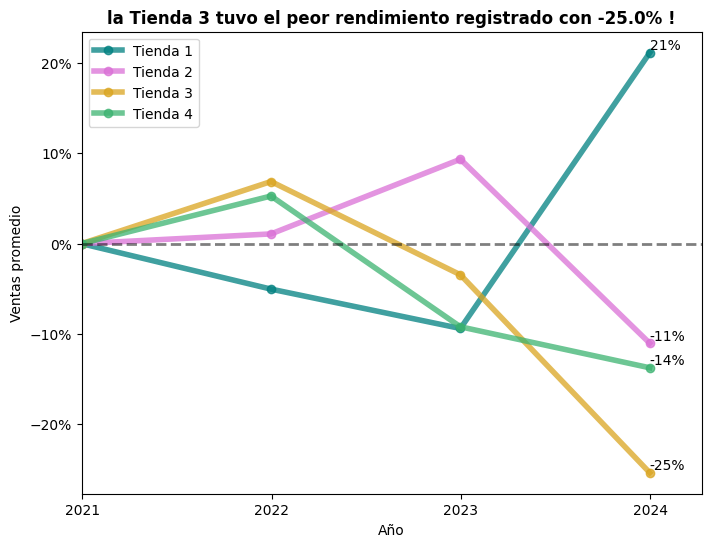

In [361]:
from matplotlib.axis import XTick
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtiker
from datetime import timedelta

# Definir el color de cada tienda
color_map = {
    'Tienda 1': 'teal',
    'Tienda 2': 'orchid',
    'Tienda 3': 'goldenrod',
    'Tienda 4': 'mediumseagreen'
}

# Ordenar los colores para las tiendas
colors = [color_map[tienda] for tienda in porcentajes_de_diferencia.keys()]


# Obtener los nombres de las Tiendas
tiendas = porcentajes_de_crecimiento.index.get_level_values('Tienda').unique()

plt.figure(figsize=(8, 6))

for tienda in tiendas:
  plt.plot(porcentajes_de_crecimiento[tienda].index.get_level_values('Fecha de Compra'),
           porcentajes_de_crecimiento[tienda].values,
           label=tienda,
           lw=4,
           alpha=0.75,
           color=color_map[tienda],
           marker='o'
           )
  # Add text label only for the last data point
  last_date = porcentajes_de_crecimiento[tienda].index.get_level_values('Fecha de Compra')[-1]
  last_value = porcentajes_de_crecimiento[tienda].values[-1]
  plt.text(last_date, last_value, f'{last_value:.0%}', ha='left', va='bottom')


# Configuracion del titulo
titulo = (f'la {tienda_peor_rendimiento} '
f'tuvo el peor rendimiento registrado con '
f'{round(porcentajes_de_crecimiento[tienda_peor_rendimiento].min(), 2)* 100}% !')

plt.title(titulo,
          weight='bold',
          size=12
          )

plt.axhline(0,
            color='black',
            linestyle='--',
            linewidth=2,
            alpha=0.5
            )

# Configuracion de etiquetas y labels
plt.xlabel('Año')
plt.ylabel('Ventas promedio')
plt.legend()

# Formatear el eje X para mostrar solo el año
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().set_xlim(porcentajes_de_crecimiento[tienda].index.get_level_values('Fecha de Compra')[0],
                   porcentajes_de_crecimiento[tienda].index.get_level_values('Fecha de Compra')[-1] + timedelta(days=100)) # Added 100 days to the last date


# Formatear el eje Y mostrando en porcentaje
plt.gca().yaxis.set_major_formatter(mtiker.PercentFormatter(xmax=1))

# Mostrar Etiquetas del grafico
plt.legend()

# Mostrar Grafico
plt.show()

Podemos ver que la tienda con peores resultados fué la Tienda 3, debemos recordar que la Tienda 3 aunque tuvo peores rendimientos, esta sigue teniendo ventas mayores que la Tienda 4, no por ello no se le debe prestar mayor atención.

# 7. Mapa de Calor de ventas

# 8. Recomendaciones Finales